In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [8]:
mean_01 = [0,0]
cov_01 = [[2,0.2], [0.2,1]]

mean_02 = [3,1]
cov_02 = [[1.5,-0.2], [-0.2,2]]

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


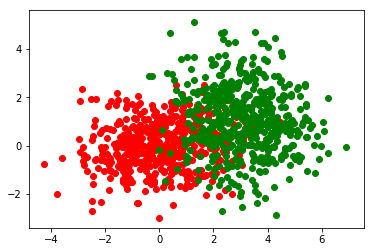

In [9]:
plt.figure()
plt.scatter(dist_01[:,0], dist_01[:,1], color='red')
plt.scatter(dist_02[:,0], dist_02[:,1], color='green')
plt.show()

In [96]:
dataset = np.zeros((dist_01.shape[0] + dist_02.shape[0], dist_01.shape[1] + 1))
dataset[:dist_01.shape[0], :-1] = dist_01
dataset[dist_01.shape[0]:, :-1] = dist_02

# Red = 0, Green = 1
dataset[dist_02.shape[0]:, -1] = 1

dataset.shape

(1000, 3)

In [97]:
np.random.shuffle(dataset)

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset[:,:-1], dataset[:,-1], test_size=0.2)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [40]:
class LogisticRegression:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.coef = np.random.uniform(low=-1, high=1, size=(self.X.shape[1], ))
        self.bias = np.random.random()
        
    
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    def hypothesis(self, x):
        return LogisticRegression.sigmoid(self.coef.dot(x) + self.bias)
    
    def predict(self, x):
        hx = self.hypothesis(x)
        if hx < 0.5:
            return 0
        else:
            return 1
        
    def compute_loss(self):
        # L = ylog(yhat) + (1-y)(log(1 - yhat))
        # In our case, substitute yhat with hypothesis()
        
        log_loss = 0
        for x,y in zip(self.X, self.y):
            yhat = self.hypothesis(x)
            loss = (y * np.log(yhat + 1e-03)) + (1 - y)*(np.log(1 - yhat + 1e-03))
            log_loss += loss
            
        neg_log_likelihood = -log_loss
        
        return neg_log_likelihood
    
    def accuracy(self, test, true_labels):
        preds = []
        for x in test:
            preds.append(self.predict(x))
        preds = np.array(preds)
        return (preds == true_labels).sum() / preds.shape[0]
    
    def apply_gradient_descent(self, learning_rate=0.01):
        
        # Compute Gradients
        gradients = np.zeros_like(self.coef)
        grad_00 = 0
        
        for i in range(self.X.shape[0]):
            xi = self.X[i]
            gradients += (self.hypothesis(xi) - self.y[i]) * xi
            grad_00 += (self.hypothesis(xi) - self.y[i])
        
        # Update Weights
        self.coef -= learning_rate * gradients
        self.bias -= learning_rate * grad_00
        
    
    def train(self, losses, iterations=1, lr=0.01):
        for _ in range(iterations):
            self.apply_gradient_descent(lr)
            losses.append(self.compute_loss())
            
        return losses
    
    

In [100]:
logreg = LogisticRegression(X_train, y_train)
losses = [logreg.compute_loss()]

In [101]:
# losses = logreg.train(losses)

In [102]:
def draw_decision_boundary(logreg):
    plt.figure()
    plt.scatter(dist_01[:, 0], dist_01[:, 1], color='red')
    plt.scatter(dist_02[:, 0], dist_02[:, 1], color='green')
    
    x = np.array([-4,5])
    y = -(logreg.coef[0] * x + logreg.bias)/logreg.coef[1]
    print(y)
    print("theta[1,2]: ", logreg.coef, 'theta0: ', logreg.bias)
    
    plt.plot(x,y, 'k')
    plt.title("Decision Boundary")
    plt.show()

[15.87244575 -5.45647707]
theta[1,2]:  [1.63296809 0.68905087] theta0:  -4.4050501800181845


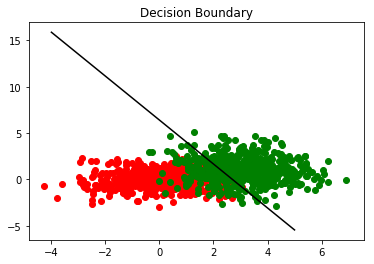

Accuracy: 0.845


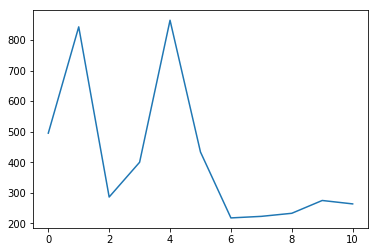

In [103]:
losses = logreg.train(losses, 10)
draw_decision_boundary(logreg)
print("Accuracy:", logreg.accuracy(X_test, y_test))
# print(logreg.coef)
# print(logreg.bias)

plt.figure()
plt.plot(losses)
plt.show()

# SKlearn

In [61]:
from sklearn.linear_model import LogisticRegression as SKLR

In [62]:
sk_logreg = SKLR()

In [63]:
sk_logreg.fit(X_train, y_train)

/Users/Pratulya/Desktop/codingblocks/ml-dwarka-june19/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
sk_logreg.score(X_test, y_test)

0.905

In [65]:
sk_logreg.coef_

array([[1.63518235, 0.70315675]])

In [66]:
sk_logreg.intercept_

array([-2.97692435])